# **The Battle of the Neighborhoods: Ice Cream Shop in Budapest, Hungary**
### [Applied Data Science Capstone by IBM/Coursera](https://www.coursera.org/learn/applied-data-science-capstone)
*Capstone Project - Week 1*

![Night panorama of the Gellért Hill, Budapest](https://upload.wikimedia.org/wikipedia/commons/9/91/Panoramic_view_of_Budapest_2014.jpg)

###Table of Contents
* [1. Introduction](#1.-Introduction)
	* [1.1. Budapest](#1.1.-Budapest)
	* [1.2. Business Problem](#1.2.-Business-Problem)
	* [1.3. Interest](#1.3.-Interest)
* [2. Data Acquisition And Preparation](#2.-Data-Acquisition-And-Preparation)
	* [2.1. Data Sources](#2.1.-Data-Sources)
	* [2.2. Data Preparation](#2.2.-Data-Preparation)
* [3. Methodology](#2.-Methodology)
	* [3.1. Finding The Busiest District In Budapest](#3.1.-Finding-The-Busiest-District-In-Budapest)
	* [3.2. Finding Direct Competitors In The Area Of The Busiest District](#3.2.-Finding-Direct-Competitors-In-The-Area-Of-The-Busiest-District)
	* [3.3. Finding Clusters Of Food Venues That Are Not Direct Competitors](#3.3.-Finding-Clusters-Of-Food-Venues-That-Are-Not-Direct-Competitors)
* [4. Results](#4.-Results)
* [5. Discussion](#5.-Discussion)
* [6. Conclusion](#6.-Conclusion)

### 1. Introduction<a name="1.-Introduction"></a>

This is report is part of the Applied Data Science Capstone course available at the Coursera Platform. This course is the ninth and final in the composition of the [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science).

This project consists of two main parts that will be delivered separately:
1.   Business problem and data preparation
2.   Methodology, visualization, results and conclusion

This section, therefore, will cover the discussion about the business problem and the acquisition of data for its future solution.

#### 1.1. Budapest<a name="1.1.-Budapest"></a>



Budapest is the capital and the most populous city of Hungary, and the ninth-largest city in the European Union by population within city limits. It is considered an Alpha City, in other words, a Global City with strengths in commerce, finance, media, art, fashion, research, technology, education, and entertainment. It is Hungary's financial centre and was ranked as the second fastest-developing urban economy in Europe. Budapest attracts around 12 million international tourists per year, making it a highly popular destination in Europe. The city was chosen as the Best European Destination of 2019, a major poll conducted by EBD, a tourism organisation partnering with the European Commission. It also topped the Best European Destinations 2020 list by Big7Media.

*Source: [Wikipedia](https://en.wikipedia.org/wiki/Budapest)*

#### 1.2. Business Problem<a name="1.2.-Business-Problem"></a>

Considering the great historical and tourist importance of Budapest and its economic influence, not only over Hungary but over the entire European Union, many investors and entrepreneurs have turned their attention to the region. To achieve the purposes of this project, this report is focused on presenting a study that identifies the best location for opening a food venue in Budapest. More specifically, this study is aimed at stakeholders and investors who wish to open an Ice Cream Shop in the **busiest region of the city**.

Furthermore, a systematic solution to this problem should be presented with the fulfillment of three main requirements:
1.   **Finding the busiest district in Budapest:** The interest of investors and stakeholders in identifying such location is justified considering that a busy spot brings greater movement and circulation to an establishment, therefore increases its chance of success, due brand awareness and a potential increase in clientele.
2.   **Finding direct competitors in the area of the busiest district**: The goal of this requirement is to find the regions within the busiest district that are already saturated with direct competitors. This new Ice Cream Shop should be open in an area with a minimum possible competition. For this analysis, a "direct competitor" is defined as another venue that is specialized in ice cream.
3.   **Finding clusters of food venues that are not direct competitors**: Most cities have regions with clusters of restaurants, bars, and pubs. These clusters are an optimal location for this Ice Cream Shop, considering that after a proper meal, people tend to look forward to a great dessert.

#### 1.3. Interest<a name="1.3.-Interest"></a>

Briefly, the Business Problem is finding a place with a great movement of people, surrounded by food venues, with a low incidence of direct competitors. Fulfilling the upper mentioned requirements is the goal of this study, which is beneficial to the stakeholders and investors of this new Ice Cream Venue. Assertiveness in the location choice of this venue is a keen factor to its future success.

## 2. Data Acquisition And Preparation <a name="2.-Data-Acquisition-And-Preparation"></a>

Based on the business problem's definition, the main factors that will influence the decision-making of the stakeholders are:
1. The number of people per square kilometer (population density) of the neighborhood
2. The number of direct competitors (Ice Cream Shops) within the densest neighborhood
3. The existence of many other types of food providers within the densest neighborhood

#### 2.1. Data Sources<a name="2.1.-Data-Sources"></a>

**DEMOGRAPHIC DATA**

Data on the population density of each district of Budapest can be found on Wikipedia:
*   Article Name: [Budapest](https://en.wikipedia.org/wiki/Budapest)
*   Article Name: [List Of Districts In Budapest](https://en.wikipedia.org/wiki/List_of_districts_in_Budapest)

**GEODATA**

*   JSON and GeoJSON files for mapping purposes can be found in this [GitHub Repository](https://github.com/integralvision/geo-data-hungary)
*   The [Foursquare API](https://developer.foursquare.com/) will be providing the geospatial data of venues.

**BUSINESS DATA**

*   The [Foursquare API](https://developer.foursquare.com/) also will be providing the data of venue categories, competitors, and food-related businesses.

#### 2.2. Data Preparation<a name="2.2.-Data-Preparation"></a>

To start the Data Preparation and Cleaning, some basic libraries are required.

In [1]:
# Install the needed packages
!pip install geopandas

# Print a confirmation
print ("Packages successfully installed")

     |████████████████████████████████| 962kB 2.5MB/s 
     |████████████████████████████████| 10.9MB 6.4MB/s 
     |████████████████████████████████| 14.7MB 249kB/s 
Packages successfully installed


In [2]:
# Import the basic libraries
import geopandas
import folium
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns

# Print a confirmation
print ("Libraries successfully imported!")

Libraries successfully imported!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**DEMOGRAPHIC DATA**

In [3]:
# Select our data source
bdp_popul = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_in_Budapest')[1]

# Split the column 'Name' into a new column 'Official Name' to get cleaner strings
bdp_popul['official_name'] = bdp_popul['Name'].str.split(' ').str[0]

# Delete the column 'Name'
bdp_popul.drop(['Name'], axis=1, inplace=True)

# Rearrange the order of the columns
bdp_popul = bdp_popul[['District', 'official_name', 'Population (2016)', 'Area (km2)','Population density (people per km2)']]

# Rename the columns headers
bdp_popul.rename(columns={'District':'distric_kerulet', 'Population (2016)':'population',
                          'Area (km2)':'area_km2', 'Population density (people per km2)':'density'}, 
                 inplace=True)

# Add "Budapest" to the column "distric_kerulet"
bdp_popul.distric_kerulet  = 'Budapest ' + bdp_popul.distric_kerulet.astype(str)

# Delete the last row
bdp_popul = bdp_popul[:-1]

# Fill the missing values on the column 'official_name'
bdp_popul.at[15, 'official_name'] = 'Árpádföld-Cinkota-Mátyásföld-Sashalom-Rákosszentmihály'
bdp_popul.at[1, 'official_name'] = 'Rózsadomb'

# Sort the data by the column "density"
bdp_popul = bdp_popul.sort_values(['density'], ascending=False).reset_index(drop=True)

# Display the DataFrame
bdp_popul.head()

,distric_kerulet,official_name,population,area_km2,density
0,Budapest VII. kerület,Erzsébetváros,53381,2.09,25541.1
1,Budapest VI. kerület,Terézváros,38504,2.38,16178.1
2,Budapest VIII. kerület,Józsefváros,76811,6.85,11213.2
3,Budapest V. kerület,Belváros-Lipótváros,26284,2.59,10148.2
4,Budapest XIII. kerület,Angyalföld-Újlipótváros-Vizafogó,120256,13.43,8954.2


**GEODATA**

In [4]:
# Get the source of the GeoJSON file to map the country Budapest
r_budapest = requests.get('https://raw.githubusercontent.com/diogohslenzi/Capstone_Project/master/budapest.geojson')

# Get the country file into a JSON
try:
    districts_budapest = r_budapest.json()
except ValueError:
    print("Response content is not valid JSON")

In [5]:
# Create GeoDataFrame
gdf_budapest = geopandas.GeoDataFrame.from_features(districts_budapest)

# Set the CRS in GeoPandas
gdf_budapest.crs = {'init': 'epsg:4326', 'no_defs': True}

# Display the DataFrame
gdf_budapest.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,geometry,name,type,type:hu,ksh,osm_id,parent
0,"MULTIPOLYGON (((19.02373 47.49557, 19.02374 47...",Budapest I. kerület,district,járás,001,221984,"{'name': 'Budapest', 'type': 'county', 'type:h..."
1,"MULTIPOLYGON (((18.92617 47.54345, 18.92979 47...",Budapest II. kerület,district,járás,002,221980,"{'name': 'Budapest', 'type': 'county', 'type:h..."
2,"MULTIPOLYGON (((18.97760 47.57392, 18.97721 47...",Budapest III. kerület,district,járás,003,221976,"{'name': 'Budapest', 'type': 'county', 'type:h..."
3,"MULTIPOLYGON (((19.06720 47.56314, 19.06741 47...",Budapest IV. kerület,district,járás,004,367963,"{'name': 'Budapest', 'type': 'county', 'type:h..."
4,"MULTIPOLYGON (((19.04202 47.51471, 19.04263 47...",Budapest V. kerület,district,járás,005,1606103,"{'name': 'Budapest', 'type': 'county', 'type:h..."


In [6]:
# Merge the DataFrames
gdf_bdp_popul = gdf_budapest.merge(bdp_popul, left_on='name', right_on='distric_kerulet')

# Delete the obsolete columns
gdf_bdp_popul.drop(['distric_kerulet','type','type:hu','ksh','osm_id','parent'], axis=1, inplace=True)

# Display the DataFrame
gdf_bdp_popul.head()

,geometry,name,official_name,population,area_km2,density
0,"MULTIPOLYGON (((19.02373 47.49557, 19.02374 47...",Budapest I. kerület,Várkerület,25196,3.41,7388.8
1,"MULTIPOLYGON (((18.92617 47.54345, 18.92979 47...",Budapest II. kerület,Rózsadomb,89903,36.34,2473.9
2,"MULTIPOLYGON (((18.97760 47.57392, 18.97721 47...",Budapest III. kerület,Óbuda-Békásmegyer,130415,39.70,3285.0
3,"MULTIPOLYGON (((19.06720 47.56314, 19.06741 47...",Budapest IV. kerület,Újpest,101558,18.82,5396.2
4,"MULTIPOLYGON (((19.04202 47.51471, 19.04263 47...",Budapest V. kerület,Belváros-Lipótváros,26284,2.59,10148.2


**BUSINESS DATA**

In [7]:
# Input your credentials for future use
CLIENT_ID = 'TRP3LBH15ISZB0VPI1YLK2CQMXYUFU0AEJIWMJXDFT0MQBV0'
CLIENT_SECRET = 'ZIQXSUEBEC3RMKKP1O1GBYYGNZTRP5YC33FQ4DRA0IYMDUQI'
VERSION = '20190425'

## 3. Methodology<a name="2.-Methodology"></a>

One of the most important things to initiate an analysis is to understand the data at reach. An excellent way to do that is to visualize it throughout graphics and maps. The target is to fulfill the requirements presented in the item [1.2. Business Problem](#1.2.-Business-Problem) of this notebook.

#### 3.1. Finding The Busiest District In Budapest<a name="3.1.-Finding-The-Busiest-District-In-Budapest"></a>

In this stage, it will be considered the "busiest district" as the one that has more persons per kilometer square, in other words, the one that has the higher population density.

In [8]:
# Import some tools for ploting
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from folium import plugins
from matplotlib import pyplot as plt
from folium.plugins import MarkerCluster
%matplotlib inline

# Print a confirmation
print ("Libraries successfully imported!")

Libraries successfully imported!


**BAR PLOT**

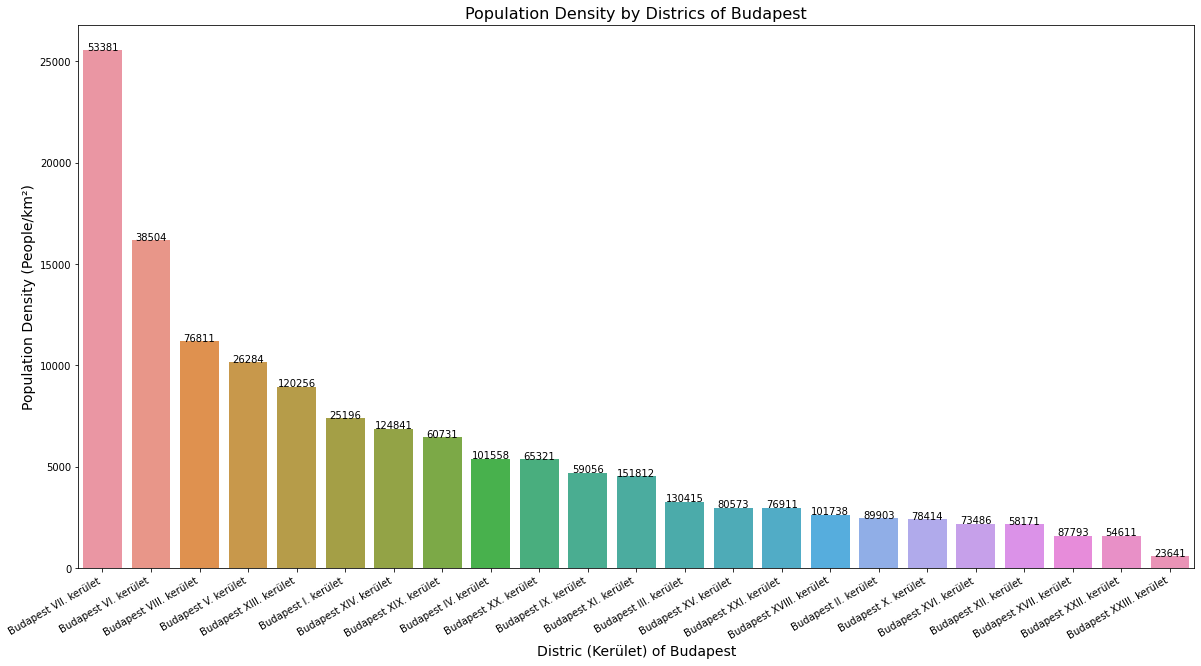

In [9]:
# Define the data and size of the plot
plt.figure(figsize=(20,10))
sns.barplot(x=bdp_popul['distric_kerulet'].value_counts().index,
            y=bdp_popul['density'].values)

# Rotate x-labels
ha = ['right', 'center', 'left']
plt.xticks(rotation=30, ha='right')

# Place the population number above every bar
g=sns.barplot(x='distric_kerulet',y='density',data=bdp_popul)
for index, row in bdp_popul.iterrows():
    g.text(row.name,row.density, row.population, color='black', ha="center")

# Name the Title and Labels of your plot
plt.xlabel('Distric (Kerület) of Budapest', fontsize=14)
plt.ylabel('Population Density (People/km²)', fontsize=14)
plt.title('Population Density by Districs of Budapest', fontsize=16)

# Show the graph
plt.show()

By analyzing this graphic, it is possible to visualize that the VII. District, also locally known as Erzsébetváros, is by far the densest district in the city of Budapest. Although this information is already sufficient to fulfill the first requirement of the solution, this form of visualization presents limitations on insights. Thus, a better form of presentation is now required.

**CHOROPLETH MAP**

In [10]:
# Discover Budapest's address with Gocode
address_bdp = 'Budapest'
geolocator = Nominatim(user_agent="bdp_explorer")
location = geolocator.geocode(address_bdp)
lat_budapest = location.latitude
lon_budapest = location.longitude

# Print the results
print('The geograpical coordinates of Budapest are {}, {}.'.format(lat_budapest, lon_budapest))

The geograpical coordinates of Budapest are 47.4983815, 19.0404707.


In [11]:
# Create a map based on the location retrieved
map_bdp = folium.Map(location=[lat_budapest, lon_budapest], zoom_start=11, tiles=None)

# Style the map and name it
folium.TileLayer('CartoDB positron',name="Budapest").add_to(map_bdp)

# Set a proper style for a Choropleth map
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

# Enhance the visualization to highlight the districts 
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

In [12]:
# Create a Choropleth showing the population density of Budapest
folium.Choropleth(
    geo_data=gdf_bdp_popul,
    name="Population Density",
    data=gdf_bdp_popul,
    columns=['name','density'],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    line_opacity=0.2,
    legend_name="Population Density (People/Km2)",
    highlight=True,
    smooth_factor=0
).add_to(map_bdp)


# Create an interactive display of information
info_district = folium.features.GeoJson(
                gdf_bdp_popul,
                style_function=style_function, 
                control=False,
                highlight_function=highlight_function, 
                tooltip=folium.features.GeoJsonTooltip(
                    fields=['name','official_name','population', 'area_km2', 'density'],
                    aliases=['District (Kerulet): ','Official District Name: ','Population (2016): ', 'Area in Km2: ', 'Population Density: '],
                    style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
                )
)

# Add the feature to the map
map_bdp.add_child(info_district)
map_bdp.keep_in_front(info_district)

# Display the map
map_bdp

Above it is presented an interactive choropleth map showing a much better and comprehensive visualization, on which the XII. District of Budapest is displayed as the neighborhood with the higher population density in the city. The map shows all the demographic data of each state when the viewer moves the cursor above it.

#### 3.2. Finding Direct Competitors In The Area Of The Busiest District<a name="3.2.-Finding-Direct-Competitors-In-The-Area-Of-The-Busiest-District"></a>

Now that the busiest district was found, according to the definitions established, for this stage of the report, the usage of the Foursquare API is requested. As the XII. District is relatively small in size, with an area of ​​only 2.09 km², as seen in the previous map, the search parameters of the Foursquare API will be configured for a radius of 1 kilometer. In this way, the search for competitors will be limited to the surrounding neighborhood in focus.

In [13]:
# Discover Budapest's VII. kerület address with Gocode
address_VII = 'VII. Kerület, Budapest'
location = geolocator.geocode(address_VII)
lat_VII = location.latitude
lon_VII = location.longitude

# Print the results
print('The geograpical coordinates of the VII. District are {}, {}.'.format(lat_VII, lon_VII))

The geograpical coordinates of the VII. District are 47.5026271, 19.077243325017964.


In [14]:
# Set the parameters of the Foursquare API
radius = 1000
LIMIT = 100

# Make a new search, this time with only Ice Cream Shops as category
url_icecream = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat_VII, 
    lon_VII, 
    radius, 
    LIMIT,
    'ice cream'
)

In [15]:
# Get the search results into a JSON file
icecream_results = requests.get(url_icecream).json()

In [16]:
# Create a fuction that returns the venue's Categories and Names
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
# Create a variable that contains your search
icecream_venues = icecream_results['response']['groups'][0]['items']

# Create a DataFrame based on this variable
icecream_venues = pd.json_normalize(icecream_venues)

# Filter with the data that you  need
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.id', 'venue.location.formattedAddress']

# Redefine "icecream_venues" based on the filtering
icecream_venues = icecream_venues.loc[:, filtered_columns]

# Apply yout function on the respective column
icecream_venues['venue.categories'] = icecream_venues.apply(get_category_type, axis=1)

# Split all information on different columns
icecream_venues.columns = [col.split(".")[-1] for col in icecream_venues.columns]

# Display the other food venues DataFrame
icecream_venues.head()

,name,categories,lat,lng,id,formattedAddress
0,Dolce Intervallo,Ice Cream Shop,47.509270,19.068351,518e5410498e91238386381d,"[Sziv u. 25, Magyarország]"
1,New York Café,Café,47.498724,19.070533,4c13f1d9a1010f47de974b18,"[Budapest, Erzsébet krt. 11. (Dohány u.), 1073..."
2,Go-Free,Dessert Shop,47.497402,19.068320,51702190e4b0fbc07002998b,"[Budapest, Dohány u. 39. (Akácfa u.), 1074, Ma..."
3,Sommer Cukrászda,Ice Cream Shop,47.507478,19.071529,4c8b3d093dc2a1cd50a4b432,"[Budapest, Szív utca 1 (Lövölde tér), 1068, Ma..."
4,Bock Bisztró,Restaurant,47.502807,19.066333,4ba3f4b8f964a5204e7138e3,"[Budapest, Erzsébet krt. 43-49. (Király u.), 1..."


In [18]:
# Get the source of the GeoJSON file to map the VII. District of Budapest
r_VII = requests.get('https://raw.githubusercontent.com/diogohslenzi/Capstone_Project/master/007-budapest-07-kerulet.geojson')

# Get the country file into a JSON
try:
    district_VII = r_VII.json()
except ValueError:
    print("Response content is not valid JSON")

In [19]:
# Create GeoDataFrame
gdf_VII = geopandas.GeoDataFrame.from_features(district_VII)

# Set the CRS in GeoPandas
gdf_VII.crs = {'init': 'epsg:4326', 'no_defs': True}

# Delete the obsolete columns
gdf_VII.drop(['type','type:hu','ksh','osm_id','parent'], axis=1, inplace=True)

# Display the DataFrame
gdf_VII

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,geometry,name
0,"MULTIPOLYGON (((19.05519 47.49754, 19.05621 47...",Budapest VII. kerület


In [20]:
# Create a new map based on Budapest's VII. District
map_VII = folium.Map(location=[lat_VII, lon_VII], zoom_start=15, tiles=None)

# Style the map and name it
folium.TileLayer('CartoDB positron',name= 'VII. District Surroundings').add_to(map_VII)

# Print the confirmation
print("Map successfully created!")

Map successfully created!


In [21]:
# Create a layer with only the VII. District
folium.GeoJson(
    gdf_VII,
    style_function=lambda feature: {
        'fillColor': '#239160',
        'color': 'black',
        'weight': 1,
        'dashArray': '3, 3'},
    control=False,
    name="VII. District"
).add_to(map_VII)

# Create a funtion to add the Ice Cream Shops on the map
def add_heat_markers(icecream_venues):
    for (j, row) in icecream_venues.iterrows():
        label = folium.Popup(row["name"], parse_html=True)
        folium.CircleMarker(
            [row["lat"], row["lng"]], 
            radius=5, 
            name="Ice Cream Shops", 
            popup=label, 
            color='blue', 
            fill=True, 
            fill_color='#3186cc', 
            fill_opacity=0.7, 
            ).add_to(map_VII)
add_heat_markers(icecream_venues)

# Creat a heat effect using Heat Map plugin
hm_data = icecream_venues[["lat", "lng"]].to_numpy().tolist()
map_VII.add_child(plugins.HeatMap(hm_data, name="Near by Ice Cream Shops"))

# Display the map
map_VII

As can be seen, the map above shows all the Ice Cream venues that are within a one-kilometer radius from the centroid of the XII. District, successfully completing the second requirement of the solution needed. Now it is time to work towards the identification of clusters of food venues in this same area.

#### 3.3. Finding Clusters Of Food Venues That Are Not Direct Competitors<a name="3.3.-Finding-Clusters-Of-Food-Venues-That-Are-Not-Direct-Competitors"></a>

Similarly to the previous section, in this analysis we will be using the Foursquare API, however this time with a broader parameter of category, aiming to return all food venues in the area, with of course the exception of the Ice Cream Venues already mapped.

In [22]:
# Set up the Foursquare API to search your parameters on venues with food categories
url_food = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat_VII, 
    lon_VII, 
    radius, 
    LIMIT,
    'food'
)

In [23]:
# Get the search results into a JSON file
food_results = requests.get(url_food).json()

In [24]:
# Create a variable that contains your search
food_venues = food_results['response']['groups'][0]['items']

# Create a DataFrame based on this variable
nearby_venues = pd.json_normalize(food_venues)

# Filter with the data that you need
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.id', 'venue.location.formattedAddress']

# Redefine "nearby_venues" based on the filtering
nearby_venues = nearby_venues.loc[:, filtered_columns]

# Apply yout function on the respective column
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# Split all information on different columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# Define a mask to get all Ice Cream Shops in the DataFrame
mask = nearby_venues.categories.str.contains("ice cream")

# Reasign the "nearby_venues" to get only food venues not related to Ice Cream Shops
nearby_venues = nearby_venues[~mask]

# Display the other food venues DataFrame
nearby_venues

,name,categories,lat,lng,id,formattedAddress
0,Kívánság Kifőzde,Restaurant,47.502294,19.074125,4d2da815fd2e236a551df2de,"[Budapest, Alsó erdősor utca 36., 1074, Magyar..."
1,Kao Niaw Ping Kai,Thai Restaurant,47.499059,19.077623,59df95c035811b538216437f,"[Budapest, Rákoczi út 69., 1081, Magyarország]"
2,Freyja,Bakery,47.499624,19.073793,5c6d03ccc62b4900397191e6,"[Budapest VII. kerület, Szövetség u. 10-12., 1..."
3,Hari Kebab,Kebab Restaurant,47.504149,19.080008,58e27b518ab03f406b9fd25a,"[Budapest VII. kerület, István u. 6., 1078, Ma..."
4,Rosenstein Vendéglő,Jewish Restaurant,47.498376,19.082250,4cdda9673644a0933c30479f,"[Budapest, Mosonyi u. 3., 1087, Magyarország]"
...,...,...,...,...,...,...
95,Nine Dragon Chinese Restaurant,Chinese Restaurant,47.506944,19.085862,56745436498ee472fbfa6577,"[Budapest, Dozsa Gyorgy Utca 56, Magyarország]"
96,Sous The Food Spot,Sandwich Place,47.496765,19.070069,56599e65498ef1ac5b2602d8,"[Budapest, Rákóczi út 44. (Erzsébet körút), 10..."
97,Maharaja Indiai Étterem,Indian Restaurant,47.503619,19.068852,4d87421299b78cfa9babf41f,"[Budapest, Csengery u. 24. (Jósika u.), 1074, ..."
98,Pointer Pub,Irish Pub,47.494906,19.070970,58f11135da5e561607b2e1f6,"[Budapest VIII. kerület, József körút 13, 1085..."


In [25]:
# Create a function to add the near by venues on the map
def add_markers(nearby_venues):
    for (j, row) in nearby_venues.iterrows():
        folium.Marker([row["lat"], row["lng"]])

# Add the function to the map using the Marker Cluster plugin
add_markers(nearby_venues)
hm_data = nearby_venues[["lat", "lng"]].to_numpy().tolist()
label = nearby_venues["name"].to_numpy().tolist()
map_VII.add_child(plugins.MarkerCluster(hm_data, popups=label, name="Near by Food Venues"))

# Add a Layer Control for the viwer
folium.LayerControl().add_to(map_VII)

# Display the map
map_VII

As shown above, the map with both Direct Competitors and Other Food Venues is complete. The viewer can investigate and choose layers on the map. At the default zoom, it is possible to identify three important clusters of other food venues.

### 4. Results<a name="4.-Results"></a>

Now that the analysis is completed and all the three requirements were successfully fulfilled, it is possible to create a final map with the optimal area for a new Ice Cream Shop.

In [26]:
# Create a new map based on Budapest's VII. District
m_ideal_loc = folium.Map(location=[lat_VII, lon_VII], zoom_start=15, tiles=None)

# Style the map and name it
folium.TileLayer('CartoDB positron',name= 'VII. District Surroundings').add_to(m_ideal_loc)

# Create a layer with only the VII. District
folium.GeoJson(
    gdf_VII,
    style_function=lambda feature: {
        'fillColor': '#239160',
        'color': 'black',
        'weight': 1,
        'dashArray': '3, 3'},
    control=False,
    name="VII. District"
).add_to(m_ideal_loc)

# Print the confirmation
print("Map successfully created!")

Map successfully created!


In [27]:
# Generate the coordinates for the ideal area with Gocode
address_ideal = 'Akácfa u. 38, Budapest'
location = geolocator.geocode(address_ideal)
lat_ideal = location.latitude
lon_ideal = location.longitude

# Print the results
print('The geograpical coordinates of the Ideal Area are {}, {}.'.format(lat_ideal, lon_ideal))

The geograpical coordinates of the Ideal Area are 47.499876, 19.0656471.


In [28]:
# Creat a Feature Group for the Layer Control
fg_competitors = folium.FeatureGroup(name='Near Ice Cream Shops', show=True)
m_ideal_loc.add_child(fg_competitors)

# Create a funtion to add the Ice Cream Shops on the map
def add_competitors(icecream_venues):
    for (j, row) in icecream_venues.iterrows():
        label = folium.Popup(row["name"], parse_html=True)
        folium.CircleMarker(
            [row["lat"], row["lng"]], 
            radius=5, 
            name="Ice Cream Shops", 
            popup=label, 
            color='black', 
            fill=True, 
            fill_color='red', 
            fill_opacity=0.7, 
            ).add_to(fg_competitors)
add_competitors(icecream_venues)

# Creat a heat effect using Heat Map plugin
hm_data = nearby_venues[["lat", "lng"]].to_numpy().tolist()
m_ideal_loc.add_child(plugins.HeatMap(hm_data, name="Near by Venues"))

# Add a circle to the map showing the Ideal Area for the Ice Cream Shop
folium.Circle(
            location=[lat_ideal, lon_ideal], 
            radius=200, 
            name="Ideal Location", 
            popup='Ideal Area', 
            color='green', 
            fill=True, 
            LayerControl=True,
            fill_color='green', 
            fill_opacity=0.5, 
            ).add_to(m_ideal_loc)

# Add a Layer Control for the viwer
folium.LayerControl().add_to(m_ideal_loc)

# Display the map
m_ideal_loc

Changing the visualization of the other food venues from clusters to heat spots, a more comprehensive view of the possible places for the new Ice Cream Shop was generated. The map also shows the competitors on red circle markers, and for the ideal location, a green circle marker was added, covering an area that complies with all the established requirements.

### 5. Discussion<a name="5.-Discussion"></a>

As presented in the final map, most food-related venues within the VII. District of Budapest is concentrated in one half of the neighborhood. More specifically, it is possible to see that venues that directly serve the public are concentrated closer to the very center of Budapest, by the Danube River.

Another interesting insight is that little direct competitors were found throughout this analysis. A plausible explanation is that instead of having specialized venues that serve restrictively ice cream, it should be considered a more broaden category of venue, serving all sorts of desserts.

Finally, exploring the datasets and information in this notebook may present some good insights, however, finding a good location does not mean acquiring it. Real estate availability and budget planning are also crucial factors to achieve a more accurate result.

### 6. Conclusion<a name="6.-Conclusion"></a>

This study demonstrates the importance of in-depth analysis and an appropriate market study for the opening of a new business. The use of the tools shown here is extremely relevant, not only for academic and scientific circles but also for the expansion and refinement of business strategies.

It can be said that the results of this analysis were satisfactory in the spectrum of the demonstration of all the tools and applications learned in the course of the specialization in Data Science by IBM, through the Coursera learning platform. However, it is worth mentioning that the pre-established requirements to identify the ideal area for the new business could be expanded, generating a more in-depth analysis.

For future work, it is suggested to include other factors that can interfere directly with the incidence of potential clientele on the venue, such as the existence of tourist spots or metro stations nearby. Also, a more appropriate investigation of the product could be initiated, such as classifying flavor appreciation. Furthermore, an in-depth analysis of the competitors could be implemented, even using the same tools utilized in this work. For instance, a word cloud could be generated using the Foursquare API, showing the menu of the direct competitors.

It is also worth mentioning that the data acquired for this analysis were taken from an outsourced and non-governmental platform, and may present unreliable and/or outdated information. For the most reliable and professional application of such analyzes and tools, access to proprietary data portals to explored entities is recommended, such as open country, state or municipality data, or authorized institutions.